In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

#  LDA


In [8]:
import pandas as pd
from nlpia.data.loaders import get_data

sms = get_data('sms-spam')
sms.head()
sms.spam.sum()
len(sms)

INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\24132\\AppData\\Roaming\\Python\\Python38\\site-packages\\nlpia\\data\\sms-spam.csv',), **{'nrows': None, 'low_memory': False})`...


,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


638

4837

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()      #分词之后得到的矩阵
tfidf_docs.shape
tfidf_docs[:3]
mask = sms.spam.astype(bool).values
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)
spam_centroid.shape      #非垃圾信息的质心
ham_centroid.round(2)    #垃圾信息的之心

spamminess_score = tfidf_docs.dot(spam_centroid-ham_centroid)
spamminess_score.round(2)   #所有text在质心连线的投影

(4837, 9232)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(9232,)

array([0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lad_predict'] = (sms.lda_score>0.49).astype(int)
sms.head()

print('准确率:',(1-(sms.lad_predict-sms.spam).abs().sum()/len(sms)))

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,spam,text,lda_score,lad_predict
0,0,"Go until jurong point, crazy.. Available only ...",0.227478,0
1,0,Ok lar... Joking wif u oni...,0.177888,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0.718785,1
3,0,U dun say so early hor... U c already then say...,0.184565,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0.286944,0


准确率: 0.9762249328095928


In [5]:
#混淆矩阵
from pugnlp.stats import Confusion
Confusion(sms['spam lad_predict'.split()])
sms['spam lad_predict'.split()]

C:\Users\24132\AppData\Roaming\Python\Python38\site-packages\pugnlp\stats.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
C:\Users\24132\AppData\Roaming\Python\Python38\site-packages\pugnlp\stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__setattr__('_hist_labels', self.sum().astype(int))
C:\Users\24132\AppData\Roaming\Python\Python38\site-packages\pugnlp\stats.py:510: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self, '_hist_classes', self.T.sum())


lad_predict,0,1
spam,,
0,4123,76
1,39,599


,spam,lad_predict
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4832,1,1
4833,0,0
4834,0,0
4835,0,0


#  PCA


In [18]:
import pandas as pd
import numpy as np

tdm = pd.DataFrame([[0,0,0,0,0,0,1,1,1,0,1],[0,0,0,0,0,0,0,0,0,0,1],[1,1,0,1,1,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0],[1,1,1,1,1,0,0,0,0,1,0],[0,0,1,0,0,0,0,0,1,1,0]],index=['cat','dog','apple','lion','nyc','love'],columns=['0','1','2','3','4','5','6','7','8','9','10'])
tdm

U,s,Vt = np.linalg.svd(tdm)   #奇异值分解

'U:词-主题矩阵'
pd.DataFrame(U,index=tdm.index).round(2)

'S:词-文档矩阵'
S = np.zeros((len(U),len(Vt)))
pd.np.fill_diagonal(S,s)
pd.DataFrame(S).round(1)

'Vt:文档-文档矩阵'
pd.DataFrame(Vt).round(2)

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


'U:词-主题矩阵'

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,-0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


'S:词-文档矩阵'

<ipython-input-18-bd8edbc716f3>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.fill_diagonal(S,s)


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


'Vt:文档-文档矩阵'

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,-0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


Text(0.5, 0, '消除的维数')

Text(0, 0.5, '重构精确率')

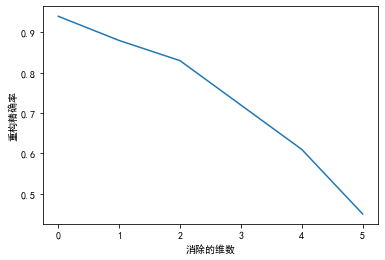

In [19]:
#主题约简：选择主题的维度
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
err = []
for numdim in range(len(s),0,-1):
    S[numdim-1,numdim-1] = 0
#     print(S)
    reconstructed_tdm = U.dot(S).dot(Vt)
    err.append(np.sqrt(((reconstructed_tdm-tdm).values.flatten()**2).sum()/np.product(tdm.shape)))
err = np.array(err).round(2)
err = [1-i for i in err]
plt.plot(err)
plt.xlabel('消除的维数')
plt.ylabel('重构精确率')
plt.show()

INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\24132\\AppData\\Roaming\\Python\\Python38\\site-packages\\nlpia\\data\\pointcloud.csv.gz',), **{'nrows': None, 'low_memory': False})`...


<AxesSubplot:xlabel='x', ylabel='y'>

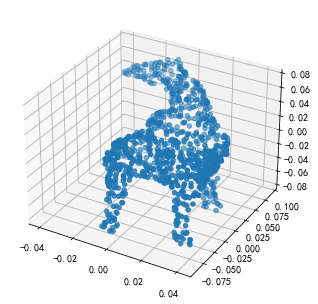

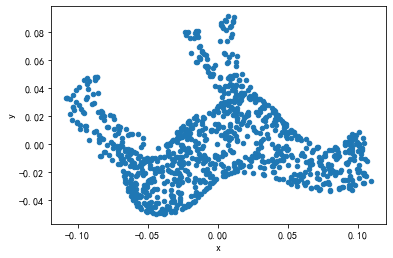

In [36]:
#三维向量的PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
from nlpia.data.loaders import get_data

from mpl_toolkits.mplot3d import Axes3D
df = get_data('pointcloud').sample(1000)

# df.iloc[:,1]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2])

pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df),columns=list('xy'))
df2d.plot(kind='scatter',x='x',y='y')
plt.show()

In [3]:
# 回归NLP，使用PCA（SVD）方法
import pandas as pd
import numpy as np
from nlpia.data.loaders import get_data

sms = get_data('sms-spam')
sms.head()

#计算TF-IDF向量
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
len(tfidf_docs),len(tfidf.vocabulary_)
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs-tfidf_docs.mean()
tfidf_docs.shape
sms.spam.sum()

INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\24132\\AppData\\Roaming\\Python\\Python38\\site-packages\\nlpia\\data\\sms-spam.csv',), **{'nrows': None, 'low_memory': False})`...


,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


(4837, 9232)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(4837, 9232)

638

# 基于PCA的短消息语义分析

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(1,17)]
index = ['sms{}{}'.format(i,'!'*j) for(i,j) in zip(range(len(sms)),sms.spam)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors,columns=columns,index=index)
pca_topic_vectors.head(6).round(2)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16
sms0,0.20,0.00,0.04,0.01,-0.02,-0.05,0.04,-0.07,0.01,-0.08,0.01,0.00,0.00,-0.04,-0.02,0.02
sms1,0.40,-0.09,-0.08,0.05,0.10,0.05,0.02,0.07,0.02,-0.02,-0.00,0.02,0.03,-0.03,0.05,-0.02
sms2!,-0.03,-0.05,0.09,-0.07,0.09,-0.04,-0.00,-0.00,-0.06,0.05,0.13,0.02,0.03,-0.03,-0.05,0.05
sms3,0.33,-0.03,-0.03,-0.02,0.05,0.06,-0.17,-0.07,0.06,-0.11,0.02,-0.00,0.06,-0.05,0.02,-0.08
sms4,0.00,0.03,0.04,0.03,-0.07,-0.09,-0.04,0.06,-0.04,0.03,0.03,-0.01,0.03,0.04,-0.08,-0.03
sms5!,-0.02,0.06,0.01,-0.01,0.12,-0.04,0.00,0.17,-0.02,0.06,0.04,0.07,-0.02,0.07,-0.00,0.01


In [5]:
# tfidf.vocabulary_
column_nums,terms = zip(*sorted(zip(tfidf.vocabulary_.values(),tfidf.vocabulary_.keys())))
# terms
# column_nums
weights = pd.DataFrame(pca.components_,columns=terms,index=['topic{}'.format(i) for i in range(16)])
weights.head().round(3)
weights.shape

,!,"""",#,#150,#5000,$,%,&,',(,...,ü'll,–,—,‘,’,“,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,-0.001,0.003,-0.000,-0.012,-0.007,-0.005,...,0.003,-0.000,-0.0,-0.004,-0.001,-0.001,-0.002,0.001,0.001,0.001
topic1,0.064,0.007,0.000,-0.000,-0.001,-0.001,-0.002,-0.016,-0.016,0.001,...,0.002,0.001,-0.0,0.004,-0.001,-0.001,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,0.002,0.000,0.001,0.059,0.008,0.019,...,0.000,0.001,-0.0,0.002,0.000,0.001,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,-0.001,0.001,-0.003,-0.028,0.001,-0.010,...,-0.001,-0.001,0.0,0.000,-0.000,-0.000,0.001,0.001,0.001,0.001
topic4,0.381,-0.009,0.001,0.001,0.004,0.003,-0.001,0.068,0.002,0.020,...,0.000,-0.000,0.0,0.000,0.001,0.001,0.002,0.001,0.001,0.001


(16, 9232)

In [6]:
#查看"half off"所属于的主题
deals = weights['! ;) :) half off free crazy deal only $ 80 %'.split()].round(3)*100
deals.head()
deals.shape
deals.T.sum()

,!,;),:),half,off,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-0.4,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.4,0.0,7.4,0.1,0.4,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,0.3,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.1,0.2,0.3,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.5,-0.1,-0.2,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1


(16, 12)

topic0    -11.9
topic1      7.6
topic2     12.7
topic3    -15.5
topic4     38.3
topic5    -33.8
topic6      5.0
topic7     -5.5
topic8     40.6
topic9     32.2
topic10   -29.7
topic11    51.2
topic12    30.7
topic13    35.2
topic14    19.1
topic15   -15.9
dtype: float64

# 隐形迪利克雷分布LDiA


In [7]:
import pandas as pd
import numpy as np
from nlpia.data.loaders import get_data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize

columns = ['topic{}'.format(i) for i in range(1,17)]
index = ['sms{}{}'.format(i,'!'*j) for(i,j) in zip(range(len(sms)),sms.spam)]

np.random.seed(42)
sms = get_data('sms-spam')
counter = CountVectorizer(tokenizer=casual_tokenize) 
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(),index=index)
column_nums,terms = zip(*sorted(zip(counter.vocabulary_.values(),counter.vocabulary_.keys())))
bow_docs.columns = terms
sms.index = index

sms.loc['sms0'].text
bow_docs.loc['sms0'][bow_docs.loc['sms0']>0].head()

#LDiA创建主题向量的过程
from sklearn.decomposition import LatentDirichletAllocation as LDiA
ldia = LDiA(n_components=16,learning_method='batch')
ldia = ldia.fit(bow_docs)
ldia.components_.shape



INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\24132\\AppData\\Roaming\\Python\\Python38\\site-packages\\nlpia\\data\\sms-spam.csv',), **{'nrows': None, 'low_memory': False})`...


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64

(16, 9232)

In [8]:
components = pd.DataFrame(ldia.components_.T,index=terms,columns=columns)     #ldia算法得到的16个主题
components.round(2).head()
components.topic3.sort_values(ascending=False)[:10]             #topic3当中的词重要性降序排列

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16
!,184.03,15.00,72.22,394.95,45.48,36.14,9.55,44.81,0.43,90.23,37.42,44.18,64.40,297.29,41.16,11.70
"""",0.68,4.22,2.41,0.06,152.35,0.06,0.06,0.06,0.45,0.68,8.42,11.42,0.07,62.72,12.27,0.06
#,0.06,0.06,0.06,0.06,0.06,2.07,0.06,0.06,0.06,0.06,0.06,0.06,1.07,4.05,0.06,0.06
#150,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,1.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
#5000,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,3.06,0.06,0.06,0.06,0.06,0.06,0.06


.      1715.188657
i      1083.922454
you     693.869152
to      688.678031
and     419.284559
it      385.985400
the     377.137863
,       325.272251
a       307.351917
me      265.945670
Name: topic3, dtype: float64

In [9]:
ldia16_topic_vectors = ldia.transform(bow_docs)     #将分词的结果用ldia进行转换，得到每一个句子分别对应每个主题的概率
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors,index=index,columns=columns)
ldia16_topic_vectors.round(2).head()
len(ldia16_topic_vectors)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16
sms0,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.78,0.01,0.01,0.12,0.01,0.01,0.01,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00
sms3,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.39,0.00,0.33,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00


4837

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ldia16_topic_vectors,sms.spam,test_size=0.5,random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(x_train,y_train)     #x_train：每个句子关于16个主题的相关程度，y_train：每个句子是不是垃圾短信的标签
sms['ldia16_spam'] = lda.predict(ldia16_topic_vectors)
round(float(lda.score(x_test,y_test)),4)
sms.head()

from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic = logic.fit(x_train,y_train)
round(float(logic.score(x_test,y_test)),4)

0.9363

,spam,text,ldia16_spam
sms0,0,"Go until jurong point, crazy.. Available only ...",0
sms1,0,Ok lar... Joking wif u oni...,0
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
sms3,0,U dun say so early hor... U c already then say...,0
sms4,0,"Nah I don't think he goes to usf, he lives aro...",0


0.9368

In [11]:
#根据tfidf来进行lda
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import PCA

tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = tfidf_docs-tfidf_docs.mean(axis=0)

pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
tfidf_docs = pca.transform(tfidf_docs)

x_train,x_test,y_train,y_test = train_test_split(tfidf_docs,sms.spam.values,test_size=0.5,random_state=271828)
lda = LDA(n_components=1)
lad = lda.fit(x_train,y_train)
round(float(lda.score(x_train,y_train)),3)
round(float(lda.score(x_test,y_test)),3)
x_train.shape

0.952

0.964

(2418, 16)

# LDiA使用32个主题的Counter分词方法

In [27]:
#使用32个主题
counter = CountVectorizer(tokenizer=casual_tokenize) 
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(),index=index)
bow_docs.shape

#构建LDiA模型
ldia32 = LDiA(n_components=32,learning_method='batch')
ldia32 = ldia32.fit(bow_docs)
ldia32.components_.shape


#用LDiA模型对分词后的结果进行转换
ldia32_topic_vectors= ldia32.transform(bow_docs)
columns32 = ['topic{}'.format(i) for i in range(0,32)]
ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors,columns=columns32,index=index)
ldia32_topic_vectors.round(2).head()

#搭建LDA模型对结果进行分类
x_train,x_test,y_train,y_test = train_test_split(ldia32_topic_vectors,sms.spam,test_size=0.5)
lda = LDA(n_components=1)
lda = lda.fit(x_train,y_train)
print('LDA模型的结果：')
round(float(lda.score(x_train,y_train)),4)
round(float(lda.score(x_test,y_test)),4)

#搭建逻辑回归模型对结果进行分类
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic = logic.fit(x_train,y_train)
print('Logistic模型的结果')
round(float(logic.score(x_train,y_train)),4)
round(float(logic.score(x_test,y_test)),4)

(4837, 9232)

(32, 9232)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic22,topic23,topic24,topic25,topic26,topic27,topic28,topic29,topic30,topic31
sms0,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.14,0.0,0.0,0.0,0.16,0.0,0.0,0.0
sms1,0.0,0.0,0.0,0.0,0.0,0.47,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
sms2!,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.35,0.0,0.0,0.0
sms3,0.0,0.0,0.0,0.0,0.0,0.93,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
sms4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


LDA模型的结果：


0.9231

0.9119

Logistic模型的结果


0.9218

0.9153

# PCA使用32个主题的tfidf分词


In [26]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = tfidf_docs-tfidf_docs.mean(axis=0)


pca = PCA(n_components=32)
pca = pca.fit(tfidf_docs)



#用LDiA模型对分词后的结果进行转换
ldia32_topic_vectors= pca.transform(tfidf_docs)
columns32 = ['topic{}'.format(i) for i in range(0,32)]
ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors,columns=columns32,index=index)
ldia32_topic_vectors.round(2).head()

#搭建LDA模型对结果进行分类
x_train,x_test,y_train,y_test = train_test_split(ldia32_topic_vectors,sms.spam,test_size=0.5)
lda = LDA(n_components=1)
lda = lda.fit(x_train,y_train)
print('LDA模型的结果：')
round(float(lda.score(x_train,y_train)),4)
round(float(lda.score(x_test,y_test)),4)

#搭建逻辑回归模型对结果进行分类
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic = logic.fit(x_train,y_train)
print('Logistic模型的结果')
round(float(logic.score(x_train,y_train)),4)
round(float(logic.score(x_test,y_test)),4)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic22,topic23,topic24,topic25,topic26,topic27,topic28,topic29,topic30,topic31
sms0,0.20,0.00,0.04,0.01,-0.02,-0.05,0.04,-0.07,0.01,-0.08,...,-0.02,0.03,-0.01,-0.04,0.01,-0.01,0.06,-0.02,-0.01,0.02
sms1,0.40,-0.09,-0.08,0.05,0.10,0.05,0.02,0.06,0.02,-0.02,...,0.01,-0.01,-0.02,0.02,0.01,0.02,0.02,-0.05,0.02,0.01
sms2!,-0.03,-0.05,0.09,-0.07,0.09,-0.04,-0.00,-0.00,-0.06,0.05,...,-0.04,-0.03,-0.00,0.01,0.00,0.05,-0.02,0.02,0.02,-0.02
sms3,0.33,-0.03,-0.03,-0.02,0.05,0.06,-0.17,-0.07,0.06,-0.11,...,-0.01,-0.01,-0.04,-0.03,0.00,0.00,-0.05,-0.10,0.02,0.02
sms4,0.00,0.03,0.04,0.03,-0.07,-0.09,-0.04,0.06,-0.04,0.03,...,-0.07,-0.03,-0.07,0.01,0.01,-0.04,-0.02,-0.04,-0.04,0.00


LDA模型的结果：


0.964

0.9661

Logistic模型的结果


0.9454

0.9405